# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   April-2020

In [1]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


## Generate and show the data

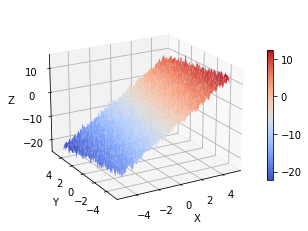

In [2]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [3]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z, rcond=None)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[-0.02300839 -0.02277373 -0.02238353 ...  0.01098406  0.01138397
   0.01164606]
 [-0.00547427 -0.00540323 -0.00460467 ... -0.00504169 -0.00490533
  -0.00497381]
 [-0.00547427 -0.00540323 -0.00460467 ... -0.00504169 -0.00490533
  -0.00497381]
 ...
 [-0.11044027 -0.10931393 -0.10744094 ...  0.05272348  0.05464305
   0.05590108]
 [-0.11274111 -0.1115913  -0.10967929 ...  0.05382188  0.05578145
   0.05706569]
 [-0.11504195 -0.11386867 -0.11191765 ...  0.05492029  0.05691984
   0.05823029]]


## Multilinear regression model

In [4]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.013e+05
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:23:07   Log-Likelihood:                -14461.
No. Observations:               10201   AIC:                         2.893e+04
Df Residuals:                   10198   BIC:                         2.895e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9837      0.010   -503.953      0.0